## What does Named Entity Recognition do for you?

Entity extraction takes text, 
and recognizes things that fall within some well-defined categories,
and focusing specifically on any fairly consistently named things - hence _named_ entities, and Named Entity Recognition (NER).

A classical example of NER is to take a text-only sentence and point out that:

In [13]:
import spacy, spacy.displacy
english = spacy.load('en_core_web_trf')

doc     = english("Jim bought 300 shares of Acme in 2006 in Paris for 300 dollars")

spacy.displacy.render( doc, style='ent', jupyter=True)   # (side note: GPE is 'Geopolitical entity', other models might call this LOC(ATION))

### Waxing philosophical (expectation management)

### [What even are these "entities"](https://en.wikipedia.org/wiki/Named-entity_recognition)?

Okay, neat example. But what does it do well, and what doesn't it do well?

The above wording of "fairly consistent naming" tried to sidestep some messines - in language in general,
namely that everyday speech has being being brief ''by'' leaving things to be resolved in context.

Recognizing the _kind_ of thing that is named is similarly contextual.


Computers don't have a lifetime of training in context, so it is somewhat hard to recognize
names and references. We can even trip ourselves into philosophy:
We like to think that a name points at the same thing, no matter what - the fancy name for that is
[rigid designator](https://en.wikipedia.org/wiki/Rigid_designator), and even without reading up on those,
you can probably intuit that that is only a wish, not a reality.

Even in such a basic example:
- There is more than one Jim, 
- there is more than one [Acme](https://en.wikipedia.org/wiki/Acme),
- there is more than one Paris

The other three aren't even names:
- A date isn't a name. Well, you _could_ argue that it's the best reference we have to point at a specific day, or year, or such.
- But numbers rarely if ever name things _or_ point to unique things.
- Nor does money.
- (some NER also adds time expressions, percentages, medical codes, and whatnot)

These are basically there mostly for the category, because someone had a use them, 
because NER is often done towards the goal of information extraction,
and because NER is often a singular use use pattern recognition - that you can extend to this if you want.

### Expectation management

Before you dive into details of _how_, first some expectation management:

Even though it can be (ab)used for wider patterns, NER works best on names, and sorting those into relatively few kinds.

NER will **may well** find patterns similar to the ones you gave, if they are strong enough.

NER will **sometimes** assist extracting very direct factoids like "X bought NUMBER shares of Y", but don't expect people's wording to be fixed enough to catch all.

NER will **sometimes** find vaguer references.  Maybe `the neighbour's garden` is a location, but don't count on it.

NER may **sometimes** be refined for some more some specific uses, finding some phrases you care about a lot, extending lists by finding differnt words in similar phrasing, and might do so better given a _load_ of text, and or a good amount of refining attention.  How good such plans work depends on both algorithms underneath, and the kind and amount of work you put in.

NER will **generally not** be exhaustive in picking up everything.

NER will **generally not** get all the kinds/labels correct.

NER will **not** tell you that two things are pointing at the same thing.

NER will **not** tell you what specific concept a name is actually pointing at.

NER will **not** tell you which of the names are most interesting towards overall topic.


**Whether that's good or bad depends on what you need.**

A linguist might dream of something that does exhaustive and accurate semantic markup of all the reference-like things within all sentences.
...and be disappointed when, half the time, it missed marking up something as a name at all, or e.g. insists a person must be a LOCation.

At the same time, if it misses half of all cases, it might be good at _document_ level - someone else, given exactly the same output 
but wanting to do some document-level information extraction, might be very happy to see repeated detections of organisations. 
It might still be great to see who is involved and what the document broadly addresses.


Generally, NER is useful when 
- these categories are actually useful to you
- these categories are somewhat flexible and somewhat large   (if small and fixed, you could do it with some basic pattern matching)
- we actually get consistent detection - have enough training for that

NER is not _necessary_ when
- rule based pattern matching is enough and/or
- You have a complete, exhaustive list of things you want to extract

Further points to consider:
- If you can't think of why this is useful, of clear categories to extract, then it probably isn't.
- The difference between 'doing a thing well' and 'doing a thing somewhat' can make or break a given purpose or project,
- ...or at the very least introduce a lot of work training it.
- If what you want is easily incomplete, or a moving target, that training is hard (true for _any_ machine learning)

And what if we do:

In [ ]:
import wetsuite.helpers.patterns,  spacy, spacy.displacy
dutch = spacy.load('nl_core_news_lg') # the actual model doesn't matter
doc = dutch( " bla CVDR101405/1 bla Stb. 2011, 35 bla 33684R2020 bla ECLI:NL:HR:2005:AT4537 bla art. 2.12, eerste lid, aanhef en onder a bla kst-26643-144-h1 bla" )
wetsuite.helpers.patterns.mark_references_spacy( doc, 
    wetsuite.helpers.patterns.find_references( doc.text, ljn=True, bekendmaking_ids=True )
)
spacy.displacy.render( doc, style='ent', jupyter=True, options={"colors":{'ECLI':'#ffaaaa', 'CVDR':'#7755ff', 'CELEX':'#ffaaff', 'ARTIKEL':'#ffaa77'}} )

Was that NER, because 
it picks useful entities, in distinct categories, 
based on patterns,
and not based on an already known specific lists?

Or was that **not** NER, because 
it's not using any context, or learning,
these are arguably not names,
and is just a some specific pattern matching that doesn't care about context,
and will never learn a variant that we didn't code specifically?

Also, do we care what we call it, when the output is what you want?

To drive that point (as well as the earlier "we have a pattern matcher") home in a more real-world way:

### An actually relevant example

Much more on topic, and applied, consider "[Named Entity Recognition in Indian court judgments](https://arxiv.org/pdf/2211.03442)"
(and [its code](https://github.com/Legal-NLP-EkStep/legal_NER)). 
<!--
There is an [online version of that and other analysis](https://summarizer-fer6v2lowq-uc.a.run.app/searchdetails#ANALYSIS)
that you can inspect (should default to an example case. Note that the URLs suggests this might be a preliminary project and might move).
-->

There also used to be a live example - and poking around its results you will find both 
- that it's a **bunch** better than our out-of-the-box NER example further down in this notebook, but also
- that not every person or organisation is marked.

The things that it extracts still seem very useful, say, 
to describing the parties involved and probably the basic topics of the case.

From the paper:

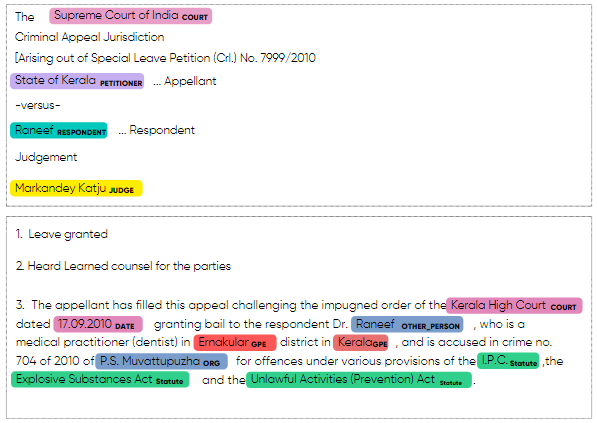


This project says that -- beyond the basic set of entity types -- it extracts e.g. 
LAWYER, PETITIONER, RESPONDENT, JUDGE, COURT, WITNESS, STATUTE, PROVISION, PRECEDENT.

That's quite the boast, as various of those are not very rigid designators.

Say, names in general aren't related to roles at all. 
How would it even do that?
Is it understanding the text?

...no, it's detecting the almost template-like sentences at the start like `Petitioner: A. Name`. 
Even if `A. Name` appears repeatedly, and all other mentions would probably be PERSON, that one initial example is an excellent, strong pattern.

Fairly rigid pattern matching would get this right too. 
Doing it with NER is what we might call **excellent abuse** of NER because it recognizes that NER too is pattern matching, 
and practical in that it recognizes that one method covers now varied pattern extraction needs.

<!--
Abuse, only in that it breaks with some classical take on NER, and breaks some expectations you may have,
and uses NER for something not all NER implementations are necessarily good at.

Excellent, in that it recognizes what the _underlying model_ is, 
that it uses word context to decide the category of a thing is,
and then uses that well _for its specific goal_.
-->

Sure, if you wanted to do full-document markup you would still have a bunch of extra work to do.
Maybe _functionally_ it would be clearer and more tweakable if a first pass detected lots of PERSONs
and have a second pass say "if we determined a name to be a JUDGE, then later repeats of that name can be changed from PERSON to JUDGE', 
and also "if it uses the word 'judge' or 'apellant' later, that is also the same reference".

But even without case-specific refinement, this is is pretty great _specifically at document-level information extraction_,
at least to answer questions like 'who was the judge, petitioner, and respondent, and based on the laws references, what kind of case was it?'.

Other examples that may be interesting, in telling us what have others done and how they have fared:

"[Evaluation of Named Entity Recognition in Dutch online criminal complaints](https://clinjournal.org/clinj/article/view/65)"
sticks with the clasics like Person, Location, Product, Organisation, Event,
and seems to conclude it's useful for basic information retrieval of topic.

"[Deep Learning for Legal Tech: exploring NER on Dutch court rulings]()" has datesm, courts, section headers, and case identifiers.

"[Named Entity Recognition of Legislation References](http://arno.uvt.nl/show.cgi?fid=160982)"
mostly just for identifiers.

"[Named entity recognition and resolution in legal text](https://www.researchgate.net/publication/220745968_Named_Entity_Recognition_and_Resolution_in_Legal_Text)"
seems to go for Jurisdiction, Court, Title, Doctype, Judge, though seems more pattern matching than NER.

TODO: find more


<!--
[or](https://arxiv.org/pdf/2103.06268) [other](http://nlp.cs.aueb.gr/pubs/icail2017.pdf) papers rarely give


Unfortunately, in general there isn't a lot of data to train legal tasks like this, less so for NER, 
less so for Dutch. We will have to do some of this ourselves.
-->

## How to go about it in theory

While `Paris` is usually a place, [it is occasionally a person, or perhaps a fictional character, a movie, a musical, or ship, or plant](https://en.wikipedia.org/wiki/Paris_(disambiguation)).

While **exact string matching** would be fast, it would have to be ''Paris&rarr;PLACE''.
It would get a bunch of cases correct just because that is the most common use,
but would get all other uses wrong _always_, putting a real damper on overall performance.

On the other side is pragmatics, modeling the world and verifying things in context,
but this is a pain to do well, computationally or not.

Yet disambiguation of text has a lot of patterns, though.  
If we were doing this by hand, then _I went to [Noun]_ or _vacation in [Noun]_ or _flew to [Noun]_ or _Catacombs of [Noun]_,
make it likelier that that name is being used as a place.
But also, we see see _Catacombs of San Gennaro_, we might conclude that San Gennaro is both a name and specifically a place,
even if we had never seen that combination of words before.

Hardcoding such rules is rarely worth the effort, so we can get maching learning to approximate those rules or patterns.
A lot of NER works like that, and needs a lot of examples to do well.
Exactly how that pattern matches works still varies.

So most NER often means using machine learning, usually something someone else has made,
and that can often be ''trained'' by us. 
All the details of which depend a on what you specifically chose to use.

## How to go about it in spacy

Say we're using spacy.
It's not our only option, or necessarily the best, but we start somewhere.

Spacy offers roughly three approaches:
* [EntityRuler](https://spacy.io/api/entityruler) - doing it yourself.
  - we briefly explored these in the [methods_nlp__patterns_spacy](methods_nlp__patterns_spacy.ipynb) notebook
  - we also just mentioned this is too much work in general, but it _might_ help get out a few _specific_ terms more exhaustively.

* There is the `ner` component, present in a bunch of models already. 
  - Code-wise this comes from [EntityRecognizer](https://spacy.io/api/entityrecognizer), which just wraps a few entirely distinct approaches:
    - (on more classic models:) a transition-based approach ([some details here if you care](https://youtu.be/sqDHBH9IjRU?t=973)) and apply them. 
      The rules are part of their ability to generalize, but also means you cannot easily increment these models with just a little knowledge at a time.
    - (on transformers-based models:) a linear classifier, or basic network, and often benefits from the more contextual word embeddings
      _Somewhat_ less clunky to train than the first
  - typically faster than SpanCategorizer (and EntityRuler)
  - models tend to have this out of the box
  - can be trained further (though this can be nontrivial)
  - does not allow overlaps

* [SpanCategorizer](https://spacy.io/api/spancategorizer)
  - its idea here is to throw any old sequence of words into the mix, and independently see if we can catergorize each as _any_ of the previously trained examples
    - the best-scoring one is assigned -- assuming that that scores better than 'poorly'
    - this isn't isn't restricted to NER at all, but can be used for it
    - `spancat` is slower than `ner`, but more flexible (e.g. allows overlap) and more trainable
  - Has no inherent goal, so does nothing out of the box - you _have_ to train it...

...so a good first question is **what does `ner` do out of the box?**.
This is easy to test: run a model on some text, see what it puts on Doc`.ents`:

In [1]:
import collections, textwrap
import spacy, spacy.displacy,  wetsuite.datasets, wetsuite.helpers.net

dutch    = spacy.load('nl_core_news_lg')   # a generic dutch NLP model that has the basic ner component

In [2]:
# count entity count, and do it separately per label, e.g. # {'GPE':{'Nederland':500, ...}, ...}
per_label = collections.defaultdict(lambda: collections.defaultdict(int))  # (the defaultdict trick is not important here)

# some text to run on, from court cases, and specifically the main body text 
#   (see the dataset loading intro,  and also this dataset's description)
for case_id, case_d in wetsuite.datasets.load('rechtspraaknl-struc').data.random_sample(1000): 
    case_text = case_d.get('bodytext') 

    doc = dutch( case_text )                   # parse text with spacy, 
    for ent in doc.ents:                       # pick out the entities,
        per_label[ent.label_][ent.text] += 1   # count them as we planned

In [6]:
# filter, sort, and print what we just counted
for label, string_count in per_label.items(): # within each label...
    # sort by count, descending:
    sorted_items = sorted(string_count.items(), key=lambda x:-x[1])  
    # filter by whether we have seen it more than a few times, and format like  'string':count 
    items = '  '.join(  f'{repr(string)}:{count}'  for string, count in sorted_items  if count>10  )

    if label in ('DATE','TIME', 'ORDINAL','CARDINAL','PERCENT','QUANTITY','MONEY'): # let's call these uninteresting to print
        continue

    print( f'\n==== {label} ({spacy.explain(label)}) ====' )
    print( '\n'.join(textwrap.wrap(items, width=120)) ) # textwrap is just there to show the same output on fewer lines


==== ORG (Companies, agencies, institutions, etc.) ====
'Hoge Raad':741  'College':488  'Raad':396  'Raad van State':337  'Uwv':320  'Rabobank':248  'NMa':223  'Centrale Raad
van Beroep':200  'Rechtbank':190  'EG':177  'IATA':166  'Anders':162  'ACM':126  'Svb':125  'Delta Lloyd':124  'ACC':119
'Hoge Raad der Nederlanden':117  'betrokkene1':114  'BW':111  'K':106  'Innophos':102  'OR':98  'III':95  'Pretium':93
'Univé':91  'WWB':90  'Chevron':90  'ILC':87  'BV':81  'Europese Commissie':81  'BinckBank':81  'Gerechtshof':80
'Wabo':78  'RVWM':74  'Ymere':72  'Z1':70  'AFM':68  'Stork':68  'CVC':68  'Fortis':67  'SSP':67  'OBR':66  'Openbaar
Ministerie':63  'LSA':63  'Chubb':63  'NVWA':63  'KLM':60  'X':59  'Tweede Kamer':59  'Raad van bestuur van het':59
'JBRA':57  'PGGM':56  'NFI':56  'Ondernemingskamer':56  'Allshare':56  'IV':55  'Kwantum':55  'Vereniging':54  'RSG':54
'Raad van State\n\nRecht':53  'Stiftung':52  'NN':51  'B.V.':50  'ROC TOP':50  'Holding B.V.':48  'NNHS':48  'GVB':48

Not _great_, not _terrible_.

Also output like this always makes it much easier to see what it did pick up picked up,
than what it did not.  Let's scrutinize it a little more by seeing it deal with some expecific text:

In [ ]:
dutch    = spacy.load('nl_core_news_lg')  # a generic dutch NLP model that has some NER
some_ner = spacy.load('xx_ent_wiki_sm')   # a more specific cross-language NER model, for comparison

In [ ]:
# get a random court case's body text
casetext = wetsuite.datasets.load('rechtspraaknl-struc').data.random_values(1)[0].get('bodytext')  
casetext = casetext[1000:2000] # cut off some introduction, and leave a smallish block of text to not spam ourselves here

In [ ]:
# parse and display
spacy.displacy.render(dutch(casetext), style='ent', jupyter=True)

In [31]:
spacy.displacy.render(some_ner(casetext), style='ent', jupyter=True)

Please re-run that a bunch of times, to note
- difference between these two models     (the first is better at dates, which can be useful),
- difference in focus, cleanliness        (the second seems to be a little better at getting boundaries right)
- difference of the caterories it assigns (no, a confiscatiebevel is not a location, a raadsman is not a work of art _or_ miscellanous per se - that sort of thing).
- what it detects and what it's missing   
  - things like raadsman, verzoeker, verzoekschrift would be great
  - we might prefer actors, acts, communications, etc. 

You'll notice that both leave something to be desired. 

## Can we refine it? Can we make it do more?

Yes, we can refine it.  The Indian work above already proved how it can be worth it as well - and some limitations.

It _does_ take **training**, and that takes **annotation**, and that takes **time**.

#### How to collect our training data

Regardless of even the library, we will need to feed it training data. 

It is possible to give it just terms, like:

        ("Apple", { 'entities': [(0, 5, 'LOC')] })

Half the point is to learn from context, so give it examples in context.
If you can, ***hand in full sentences*** rather than just a bit of context - since various underlying models train from POS, dependencies, and embeddings, and you hand in just text, spacy will be doing parsing under the covers, and that's typically more correct on complete sentences.

        ("I have not worked at Apple.", { 'entities': [(22, 27, 'LOC')] })



Note that the format of the training data isnt _exactly_ the same - `ner` takes 

        ("Words words words.", {"entities": [(start, end, "LABEL")]})
and `spancat` takes:

        ("Words words words.", {"spans": {"sc": [{"start":x, "end":y, "label":"LABEL"}]}})

That's basically the same information, so conversion seems easy enough.


Where you can, **mark _all_ the interesting entities in each example you give**
- it can pay to run other NER on your test sentences. That's basically [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning).



While spacy 3's training takes data in its own format, it's just a dumb conversion from the structure above.

You might consider [JSON](https://en.wikipedia.org/wiki/JSON_streaming#JSONL) as an intermediate,
because you easily take that elsewhere.

<!--

wetnamen = set()
for id, (namen1, namen2) in wetsuite.datasets.load('wetnamen').data.items():
    for name in namen1+namen2:
        name = name.strip(' -')#.lower()
        # turns out a 4MByte regexp isn't very fast, so we take out the very long stuff. TODO: do all this in the generation of that list.
        if len(name)>2  and len(name) < 50:
            wetnamen.add(name)

#random.sample( wetnamen, 30 )


import re
count = 0
frag_with_wetnaam = []

print('PRE')
nn = sorted( list( re.escape(naam)  for naam in wetnamen ), key=lambda s:len(s), reverse=True )

_re_str = r'\b(%s)\b'%( '|'.join( nn ) ) # this is a monster of a regexp
print( len(_re_str) )
_re_namen = re.compile( _re_str)#, flags=re.I )


import wetsuite.helpers.spacy
# This is a rather inefficient ways to do it.
print('PROC')
#for id, cvdr_xmlbytes in wetsuite.helpers.notebook.ProgressBar( wetsuite.datasets.load('cvdr-mostrecent-xml').data.random_sample(1000) ):
    #for fragment in wetsuite.helpers.split.feeling_lucky( cvdr_xmlbytes ): # we use split to place the quote within a paragraph-or-so.
for id, cvdr_txt in wetsuite.helpers.notebook.ProgressBar( wetsuite.datasets.load('cvdr-mostrecent-text').data.random_sample(100) ):
    for fragment in wetsuite.helpers.spacy.sentence_split(cvdr_txt, as_plain_sents=True):
    #for fragment in re.split('\n{2,}', cvdr_txt):
        for m in re.finditer(_re_namen, fragment):
            #print(id, m.groups()[0])
            frag_with_wetnaam.append( (fragment, m.start(), m.end()) )
            # TODO: move all matches in a fragment into one list; spacy want it that way

count
#frag_with_wetnaam



for fragment, start, end in frag_with_wetnaam:#random.sample( frag_with_wetnaam, 1 ):
    print( fragment[:start], '[' , fragment[start:end], ']', fragment[end:] )
    print('-----')
    
-->

<!--

It's easy to be self congratulatory, 
we can't strongly verify, or quantify, the performance
with the same things we fed in to train it. 
Of course it's going to find most of those.

When we give it a list we don't care about that list - it better be good at that.

We care about all the things you didn't tell it about, but we figure are relevant.
Maybe it's better at those. Maybe it's worse. You wouldn't easily know.

This is a classical issue in machine learning of any type.

The classical solution is to split the data you fed in into a training part, and testing part.
You only use a good portion to try to , and you use the rest to prove that's true.

https://towardsdatascience.com/train-ner-with-custom-training-data-using-spacy-525ce748fab7

https://spacy.io/usage/training

-->